In [11]:
import numpy as np

with open('./UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt', 'r') as file1:
    lines1 = file1.readlines()

with open('./UCI HAR Dataset/train/Inertial Signals/body_acc_y_train.txt', 'r') as file2:
    lines2 = file2.readlines()

with open('./UCI HAR Dataset/train/Inertial Signals/body_acc_z_train.txt', 'r') as file3:
    lines3 = file3.readlines()
    
with open('./UCI HAR Dataset/train/Inertial Signals/body_gyro_x_train.txt', 'r') as file4:
    lines4 = file4.readlines()

with open('./UCI HAR Dataset/train/Inertial Signals/body_gyro_y_train.txt', 'r') as file5:
    lines5 = file5.readlines()

with open('./UCI HAR Dataset/train/Inertial Signals/body_gyro_z_train.txt', 'r') as file6:
    lines6 = file6.readlines()
    
with open('./UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt', 'r') as file7:
    lines7 = file7.readlines()

with open('./UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt', 'r') as file8:
    lines8 = file8.readlines()

with open('./UCI HAR Dataset/train/Inertial Signals/total_acc_z_train.txt', 'r') as file9:
    lines9 = file9.readlines()
    
with open('./UCI HAR Dataset/train/y_train.txt', 'r') as file10:
    lines10 = file10.readlines()
    
ba_x = [line.strip().split() for line in lines1]
ba_y = [line.strip().split() for line in lines2]
ba_z = [line.strip().split() for line in lines3]
bg_x = [line.strip().split() for line in lines4]
bg_y = [line.strip().split() for line in lines5]
bg_z = [line.strip().split() for line in lines6]
ta_x = [line.strip().split() for line in lines7]
ta_y = [line.strip().split() for line in lines8]
ta_z = [line.strip().split() for line in lines9]
la = [line.strip().split() for line in lines10]

x_train = []
labels = []

for i in range(len(ba_x)):
    temp = np.vstack((ba_x[i], ba_y[i], ba_z[i], bg_x[i], bg_y[i], bg_z[i], ta_x[i], ta_y[i], ta_z[i]))
    x_train.append(temp)
    labels.append(la[i][0])

x_train = np.dstack(x_train)

# Transpose the array
x_train = np.transpose(x_train, (2, 1, 0))

y_train = np.asarray(labels)

print(x_train.shape)  # Output: (7352, 128, 4)
print(y_train.shape)

(7352, 128, 9)
(7352,)


In [12]:
import numpy as np

with open('./UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt', 'r') as file1:
    lines1 = file1.readlines()

with open('./UCI HAR Dataset/test/Inertial Signals/body_acc_y_test.txt', 'r') as file2:
    lines2 = file2.readlines()

with open('./UCI HAR Dataset/test/Inertial Signals/body_acc_z_test.txt', 'r') as file3:
    lines3 = file3.readlines()
    
with open('./UCI HAR Dataset/test/Inertial Signals/body_gyro_x_test.txt', 'r') as file4:
    lines4 = file4.readlines()

with open('./UCI HAR Dataset/test/Inertial Signals/body_gyro_y_test.txt', 'r') as file5:
    lines5 = file5.readlines()

with open('./UCI HAR Dataset/test/Inertial Signals/body_gyro_z_test.txt', 'r') as file6:
    lines6 = file6.readlines()
    
with open('./UCI HAR Dataset/test/Inertial Signals/total_acc_x_test.txt', 'r') as file7:
    lines7 = file7.readlines()

with open('./UCI HAR Dataset/test/Inertial Signals/total_acc_y_test.txt', 'r') as file8:
    lines8 = file8.readlines()

with open('./UCI HAR Dataset/test/Inertial Signals/total_acc_z_test.txt', 'r') as file9:
    lines9 = file9.readlines()
    
with open('./UCI HAR Dataset/test/y_test.txt', 'r') as file10:
    lines10 = file10.readlines()
    
ba_x_t = [line.strip().split() for line in lines1]
ba_y_t = [line.strip().split() for line in lines2]
ba_z_t = [line.strip().split() for line in lines3]
bg_x_t = [line.strip().split() for line in lines4]
bg_y_t = [line.strip().split() for line in lines5]
bg_z_t = [line.strip().split() for line in lines6]
ta_x_t = [line.strip().split() for line in lines7]
ta_y_t = [line.strip().split() for line in lines8]
ta_z_t = [line.strip().split() for line in lines9]
la_t = [line.strip().split() for line in lines10]

x_test = []
labels_t = []

for i in range(len(ba_x_t)):
    temp_t = np.vstack((ba_x_t[i], ba_y_t[i], ba_z_t[i], bg_x_t[i], bg_y_t[i], bg_z_t[i], ta_x_t[i], ta_y_t[i], ta_z_t[i]))
    x_test.append(temp_t)
    labels_t.append(la_t[i][0])

x_test = np.dstack(x_test)

# Transpose the array
x_test = np.transpose(x_test, (2, 1, 0))

y_test = np.asarray(labels_t)

print(x_test.shape)  # Output: (7352, 128, 4)
print(y_test.shape)

(2947, 128, 9)
(2947,)


In [13]:
from keras.utils import to_categorical

x_train = x_train.astype(float)
x_test = x_test.astype(float)

y_train.astype(int)

y_train = to_categorical(y_train)

In [14]:
# Initialize the CNN model
model = Sequential()

# First Convolutional Layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))

# Second Convolutional Layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Flatten layer to feed into the fully connected layers
model.add(Flatten())

# Fully Connected Layers with L1/L2 regularization
model.add(Dense(256, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(7, activation='softmax'))  # num_classes is the number of activity classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


/Users/nagajahnavikommareddy/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 126, 32)        │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 63, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 61, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1920)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       491,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 534,215 (2.04 MB)

 Trainable params: 533,447 (2.03 MB)

 Non-trainable params: 768 (3.00 KB)

In [18]:
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

# Define the number of folds for cross-validation
n_splits = 5

# Initialize MultiLabel Stratified K-fold cross-validator
kfold = MultilabelStratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store cross-validation results
cv_scores = []

# Perform K-fold cross-validation
for train_index, val_index in kfold.split(x_train, y_train):
    # Split the data into training and validation sets
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # Train the model
    model.fit(x_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0)
    
    # Evaluate the model on the validation set
    scores = model.evaluate(x_val_fold, y_val_fold, verbose=0)
    
    # Store the accuracy in the list
    cv_scores.append(scores[1])

# Calculate the mean and standard deviation of the cross-validation scores
mean_accuracy = np.mean(cv_scores)
std_accuracy = np.std(cv_scores)

print(f'Cross-Validation Accuracy: {mean_accuracy}')


Cross-Validation Accuracy: 0.9563410520553589


In [285]:
from keras.utils import to_categorical

x_train = x_train.astype(float)
x_test = x_test.astype(float)

y_train.astype(int)

y_train = to_categorical(y_train)

In [411]:
history = model.fit(x_train, y_train, epochs=20, batch_size = 500)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9919 - loss: 0.1537
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9889 - loss: 0.1595
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9928 - loss: 0.1501
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9925 - loss: 0.1488
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9921 - loss: 0.1501
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9917 - loss: 0.1452
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9918 - loss: 0.1432
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9934 - loss: 0.1511
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9917 - loss: 0.1601
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9909 - loss: 0.1592
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9922 - loss: 0.1532
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy:

In [417]:
from sklearn.metrics import accuracy_score

y_test_pred = np.argmax(model.predict(x_test), axis=1)
y_train_pred = np.argmax(model.predict(x_train), axis=1)

train_acc = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Training accuracy: {}".format(train_acc))
print("Testing accuracy: {}".format(test_acc))


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training accuracy: 0.9938792165397171
Testing accuracy: 0.9406175771971497


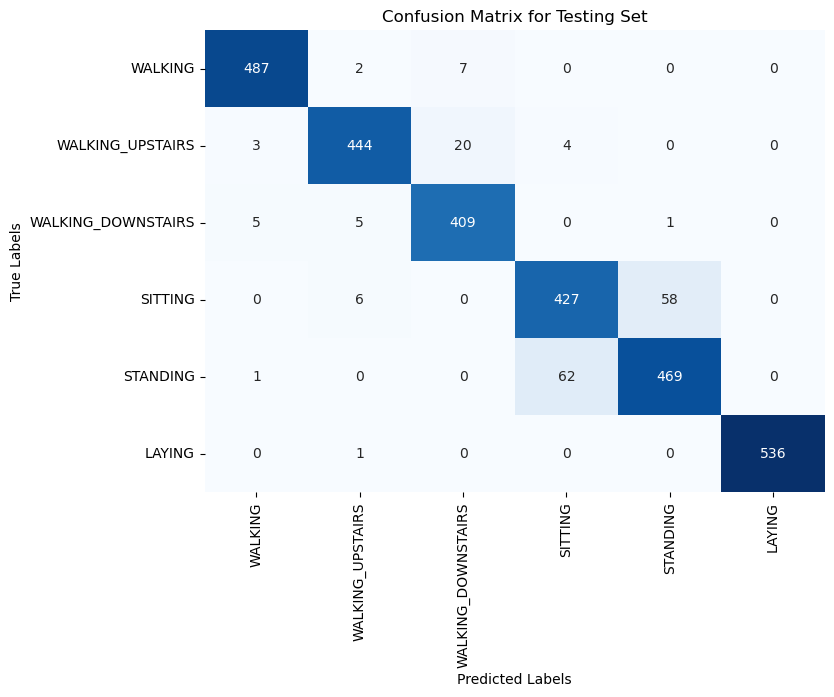

In [420]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Activity mapping
activity_mapping = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING'
}

# Confusion matrix for testing set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix heatmap with activity mapping
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=[activity_mapping[i] for i in range(1, 7)],
            yticklabels=[activity_mapping[i] for i in range(1, 7)])
plt.title("Confusion Matrix for Testing Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [421]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.98      0.98       496
           2       0.97      0.94      0.96       471
           3       0.94      0.97      0.96       420
           4       0.87      0.87      0.87       491
           5       0.89      0.88      0.88       532
           6       1.00      1.00      1.00       537

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947



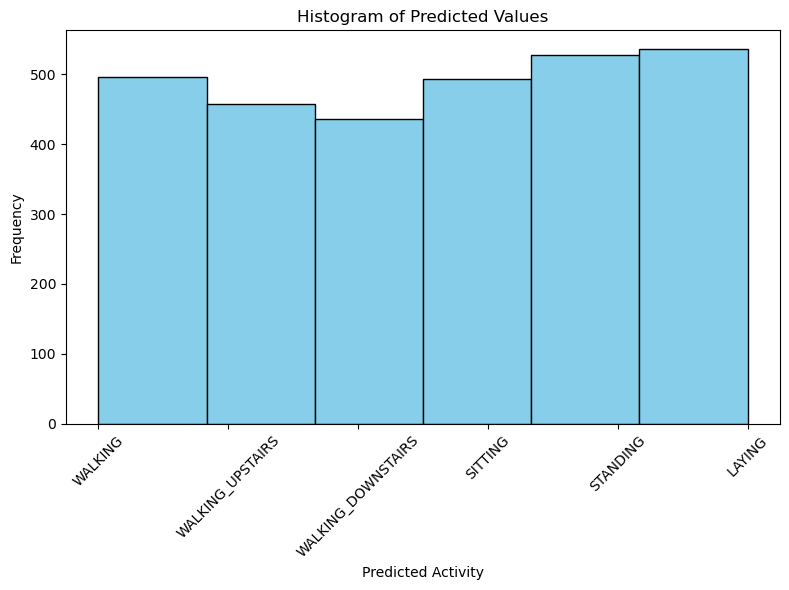

In [423]:
import matplotlib.pyplot as plt

# Assuming you have already predicted values stored in y_test_pred

# Create a histogram of predicted values
plt.figure(figsize=(8, 6))
plt.hist(y_test_pred, bins=len(np.unique(y_test_pred)), color='skyblue', edgecolor='black')
plt.title('Histogram of Predicted Values')
plt.xlabel('Predicted Activity')
plt.ylabel('Frequency')
plt.xticks(np.arange(1, 7), [activity_mapping[i] for i in range(1, 7)], rotation=45)
plt.tight_layout()
plt.show()
